# Introduction to Supervised Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

## REGRESSION: Predicting a continuous value

In [2]:
# Load California housing dataset for regression
# This dataset contains information about housing in California
california = datasets.fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [3]:
# Create a simple dataframe
data = pd.DataFrame(california.data, columns=california.feature_names)
data['PRICE'] = california.target

# Display what we're working with
print("We're using the California Housing dataset to predict house prices")
print(f"Number of examples: {len(data)}")
print("First 5 rows:")
data.head(5)

We're using the California Housing dataset to predict house prices
Number of examples: 20640
First 5 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# We use just one feature - AveRooms (average rooms per household)
X = data[['AveRooms']]  # Input feature
y = data['PRICE']  # Target variable (house prices in $100,000s)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"\nTraining with {X_train.shape[0]} examples")
print(f"Testing with {X_test.shape[0]} examples")


Training with 15480 examples
Testing with 5160 examples


In [5]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the simple model equation
print(f"\nModel equation: Price = {model.coef_[0]:.2f} × Average Rooms + {model.intercept_:.2f}")


Model equation: Price = 0.07 × Average Rooms + 1.66


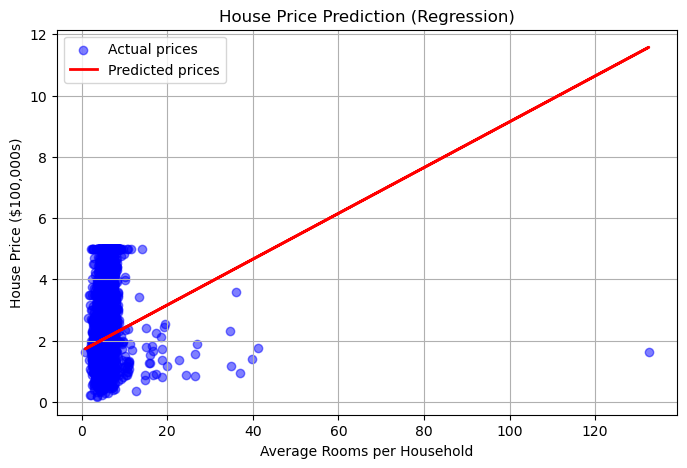

In [6]:
# Visualize regression results
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted prices')
plt.title('House Price Prediction (Regression)')
plt.xlabel('Average Rooms per Household')
plt.ylabel('House Price ($100,000s)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Example predictions
sample_rooms = np.array([[3.0], [4.0], [6.0]])
price_predictions = model.predict(sample_rooms)

print("\nExample predictions:")
for i, rooms in enumerate(sample_rooms):
    print(f"A house with {rooms[0]} average rooms would cost approximately ${price_predictions[i]:.2f}00,000")


Example predictions:
A house with 3.0 average rooms would cost approximately $1.8900,000
A house with 4.0 average rooms would cost approximately $1.9600,000
A house with 6.0 average rooms would cost approximately $2.1100,000


/home/saurabh/miniconda3/envs/ccs2/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## CLASSIFICATION: Predicting a category

In [8]:
# Load Iris dataset for classification
iris = datasets.load_iris()

# Create a simple dataframe
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['SPECIES'] = iris.target

# Convert numeric species to actual names
species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_data['SPECIES_NAME'] = iris_data['SPECIES'].map(species_names)

# Display what we're working with
print("We're using the Iris flower dataset to classify flower species")
print(f"Number of examples: {len(iris_data)}")
print("Randomly chosen 5 rows:")
iris_data.sample(5)

We're using the Iris flower dataset to classify flower species
Number of examples: 150
Randomly chosen 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),SPECIES,SPECIES_NAME
57,4.9,2.4,3.3,1.0,1,versicolor
71,6.1,2.8,4.0,1.3,1,versicolor
135,7.7,3.0,6.1,2.3,2,virginica
138,6.0,3.0,4.8,1.8,2,virginica
74,6.4,2.9,4.3,1.3,1,versicolor


In [9]:
# Keep it simple: use just two features for easy visualization
X_iris = iris_data[['petal length (cm)', 'petal width (cm)']]
y_iris = iris_data['SPECIES']

# Split data
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.25, random_state=42)

print(f"\nTraining with {X_train_iris.shape[0]} examples")
print(f"Testing with {X_test_iris.shape[0]} examples")


Training with 112 examples
Testing with 38 examples


In [10]:
# Create and train a classifier (logistic regression)
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_iris, y_train_iris)

# Make predictions
y_pred_iris = clf.predict(X_test_iris)

# Convert predictions to flower names
y_pred_names = [species_names[prediction] for prediction in y_pred_iris]
y_test_names = [species_names[actual] for actual in y_test_iris]

# Show a few predictions
print("\nSample predictions:")
for i in range(5):
    print(f"Petal length: {X_test_iris.iloc[i, 0]} cm, Petal width: {X_test_iris.iloc[i, 1]} cm")
    print(f"Predicted species: {y_pred_names[i]}, Actual species: {y_test_names[i]}")


Sample predictions:
Petal length: 4.7 cm, Petal width: 1.2 cm
Predicted species: versicolor, Actual species: versicolor
Petal length: 1.7 cm, Petal width: 0.3 cm
Predicted species: setosa, Actual species: setosa
Petal length: 6.9 cm, Petal width: 2.3 cm
Predicted species: virginica, Actual species: virginica
Petal length: 4.5 cm, Petal width: 1.5 cm
Predicted species: versicolor, Actual species: versicolor
Petal length: 4.8 cm, Petal width: 1.4 cm
Predicted species: versicolor, Actual species: versicolor


/home/saurabh/miniconda3/envs/ccs2/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


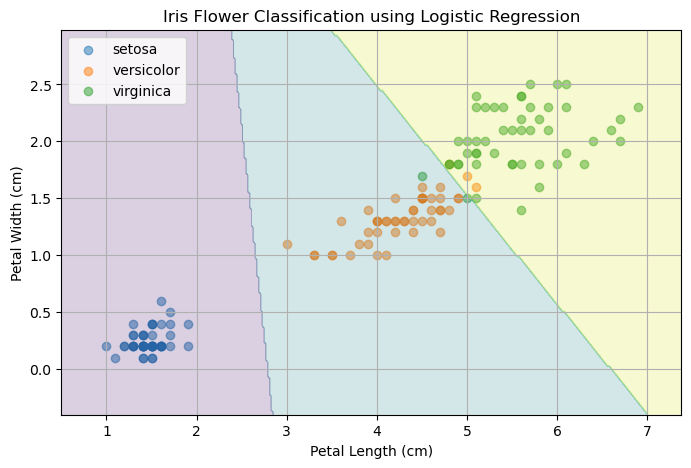

In [11]:
# Visualize classification results
plt.figure(figsize=(8, 5))

# Plot training data
for species in range(3):
    species_data = iris_data[iris_data['SPECIES'] == species]
    plt.scatter(species_data['petal length (cm)'], species_data['petal width (cm)'], 
                label=species_names[species], alpha=0.5)

# Create a grid to show decision boundaries
x_min, x_max = X_iris['petal length (cm)'].min() - 0.5, X_iris['petal length (cm)'].max() + 0.5
y_min, y_max = X_iris['petal width (cm)'].min() - 0.5, X_iris['petal width (cm)'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.2)
plt.title('Iris Flower Classification using Logistic Regression')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()

Summary:

1. Linear Regression: predicts a continuous value (like house price)
2. Logistic Regression: predicts a discrete category or class (like flower species)

Both are examples of supervised learning, where we train the model on labeled data, and then use it to make predictions on new data.